In [3]:
data_frame = pandas.read_csv('https://raw.githubusercontent.com/stefaneidelloth/jupyterDemo/master/data.csv',sep=';')

In [5]:
data_frame

,A,B,C,D
0,a1,b1,10,1
1,a1,b1,20,2
2,a1,b2,30,3
3,a1,b2,40,4


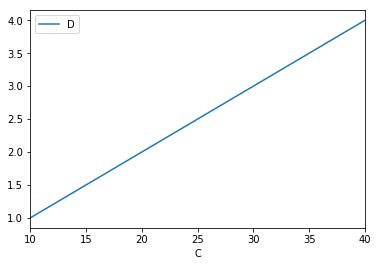

In [9]:
data_frame.plot(x='C',y='D')

In [15]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


output_notebook()
show(column(slider, plot))

Loading BokehJS ...